In [48]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Now we need to read in the data
df = pd.read_csv(r'C:\Users\Moto\Downloads\movies.csv')

In [49]:
# Let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [50]:
# Let's see if there is any missing data

for col in df.columns :
    p_missing = round(np.mean(df[col].isnull()),1)
    print('{} : {}%'.format(col, p_missing))

# seems some missing...

name : 0.0%
rating : 0.0%
genre : 0.0%
year : 0.0%
released : 0.0%
score : 0.0%
votes : 0.0%
director : 0.0%
writer : 0.0%
star : 0.0%
country : 0.0%
budget : 0.3%
gross : 0.0%
company : 0.0%
runtime : 0.0%


In [51]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [53]:
# change data type of columns

df['budget']= df['budget'].fillna(0)
df['gross']= df['gross'].fillna(0)

In [54]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [55]:
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,0,0,PK 65 Films,102.0


In [56]:
# df['released'] = df['released'].astype('str')
df['released']= df['released'].astype('str').str.split(',').str[1]
df['year_correct'] = df['released'].astype('str').str.split(' ').str[1]

In [57]:
df['year_correct']= df['year_correct'].fillna(0)
df['year_correct'] = df['year_correct'].astype('int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,1980 (United States),8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,1980 (United States),5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980 (United States),8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,1980 (United States),7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,1980 (United States),7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [12]:
len(df[df['year'] != df['year_correct']])

1356

In [13]:
df.sort_values(by = 'gross',inplace = False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,2009 (United States),7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019 (United States),8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,1997 (United States),7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015 (United States),7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018 (United States),8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [86]:
df.sort_values(by = 'gross',inplace = False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,2009 (United States),7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019 (United States),8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,1997 (United States),7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015 (United States),7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018 (United States),8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [87]:
pd.set_option('display.max_rows',None)

In [20]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending = False).head()

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

In [58]:
# Find the correlation

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


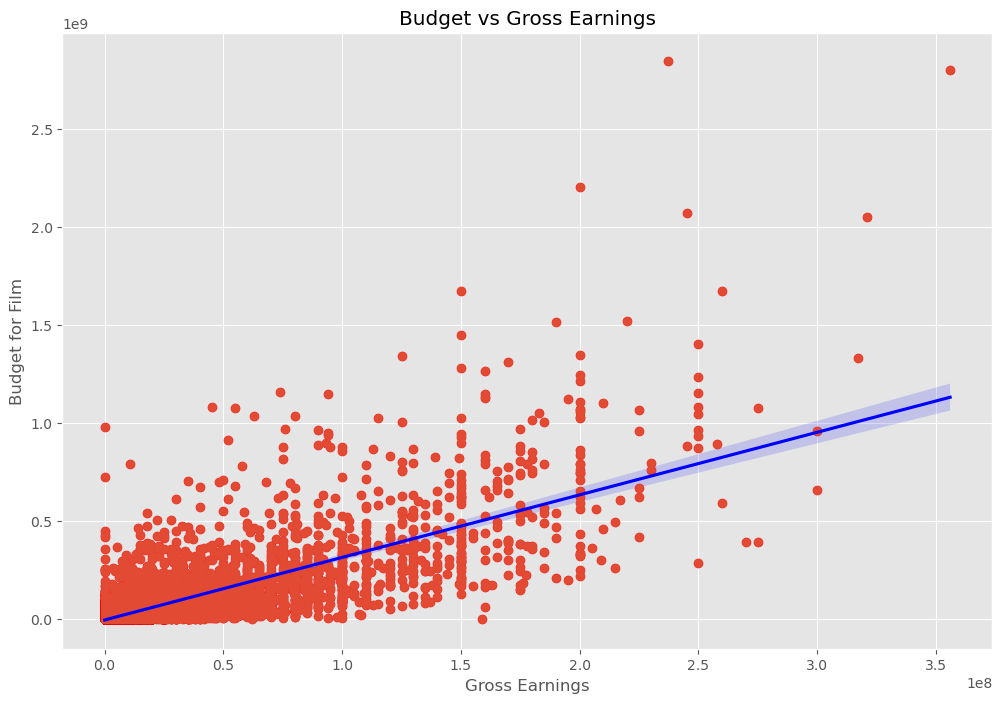

In [61]:
# budget vs company, Scatter plot with budget vs gross

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [60]:
# budget vs gross using seaborn

sns.regplot(x='budget', y='gross',data=df,scatter_kws ={"color": "red"} , line_kws = {"color": "blue"})

<Axes: xlabel='budget', ylabel='gross'>

In [62]:
# Let's start looking at correlationabs

df[["budget", "gross","score","votes",  "runtime", "year"]].corr(method = 'pearson') #perason, kendall, spearman


,budget,gross,score,votes,runtime,year
budget,1.000000,0.750157,0.055665,0.486862,0.269510,0.309212
gross,0.750157,1.000000,0.186392,0.632834,0.245235,0.261900
score,0.055665,0.186392,1.000000,0.409182,0.399451,0.097995
votes,0.486862,0.632834,0.409182,1.000000,0.309212,0.222945
runtime,0.269510,0.245235,0.399451,0.309212,1.000000,0.120811
year,0.309212,0.261900,0.097995,0.222945,0.120811,1.000000


In [ ]:
# High correlation between budget and gross
# I was right

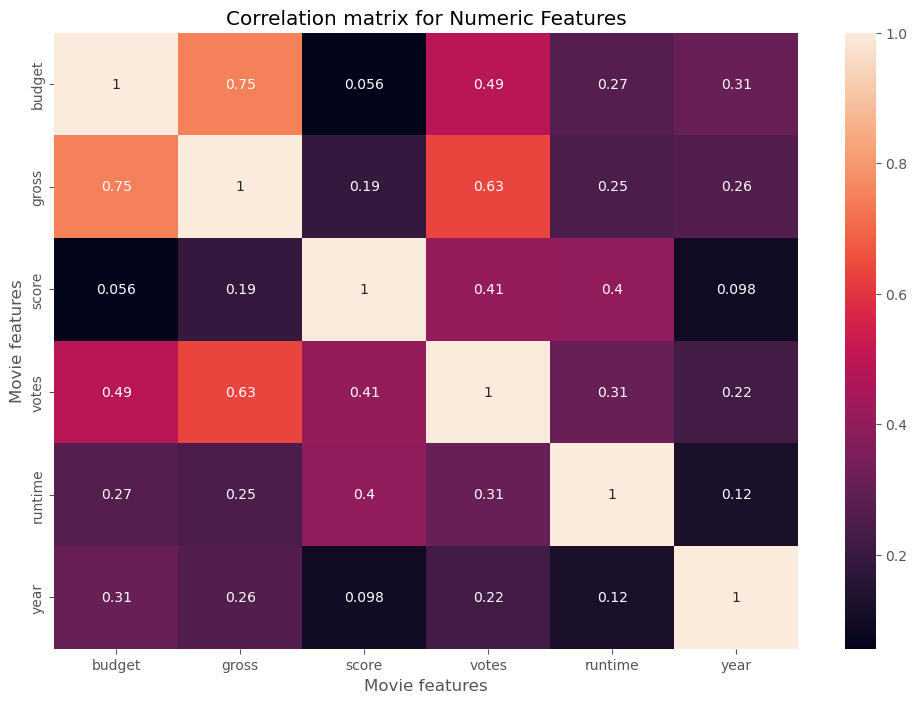

In [63]:
# Heatmap of numeric features

corr_matrix = df[["budget", "gross", "score","votes", "runtime", "year"]].corr(method = 'pearson')

sns.heatmap(corr_matrix ,annot= True)

plt.title('Correlation matrix for Numeric Features')

plt.xlabel('Movie features')

plt.ylabel('Movie features')

plt.show()

In [64]:
# Look at Company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,1980 (United States),8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,1980 (United States),5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980 (United States),8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,1980 (United States),7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,1980 (United States),7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


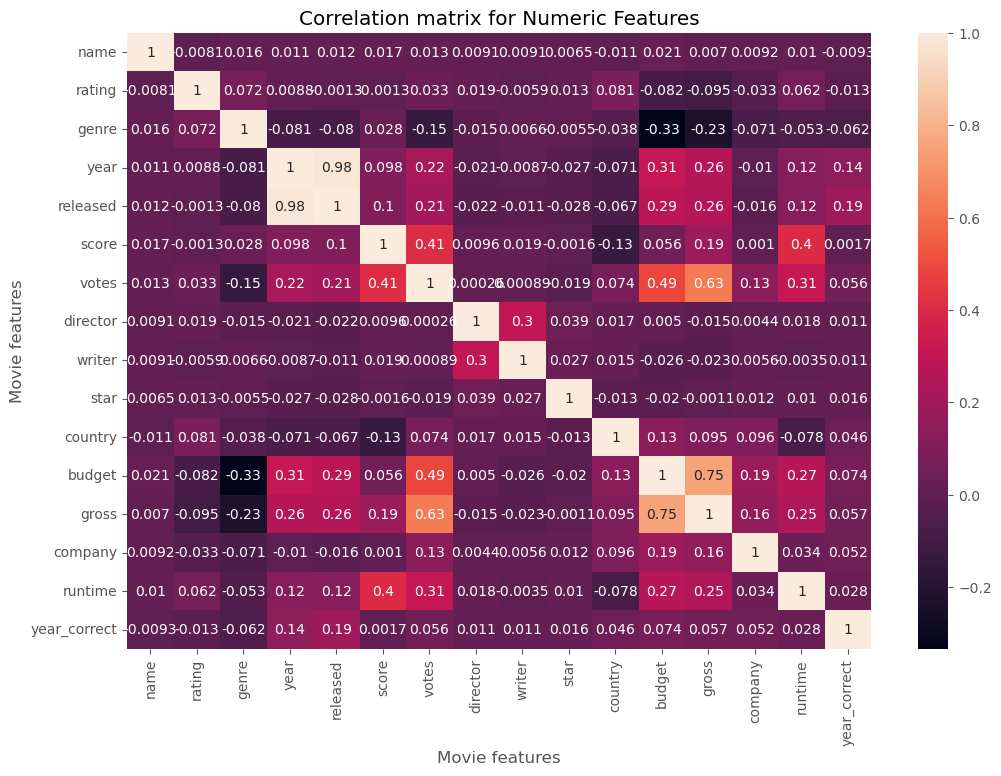

In [65]:
corr_matrix = df_numerised.corr(method='pearson')

sns.heatmap(corr_matrix ,annot= True)

plt.title('Correlation matrix for Numeric Features')

plt.xlabel('Movie features')

plt.ylabel('Movie features')

plt.show()

In [67]:
df_numerised.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.008069,0.016355,0.011453,0.012348,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,-0.009264
rating,-0.008069,1.000000,0.072423,0.008779,-0.001292,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,-0.013129
genre,0.016355,0.072423,1.000000,-0.081261,-0.080101,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,-0.061689
year,0.011453,0.008779,-0.081261,1.000000,0.980716,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,0.143738
released,0.012348,-0.001292,-0.080101,0.980716,1.000000,0.100891,0.208811,-0.022077,-0.011296,-0.027721,-0.067298,0.286710,0.258452,-0.016286,0.119196,0.192185
score,0.017097,-0.001314,0.027965,0.097995,0.100891,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.001653
votes,0.013088,0.033225,-0.145307,0.222945,0.208811,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,0.056070
director,0.009079,0.019483,-0.015258,-0.020795,-0.022077,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,0.010682
writer,0.009081,-0.005921,0.006567,-0.008656,-0.011296,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,0.011463
star,0.006472,0.013405,-0.005477,-0.027242,-0.027721,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,0.016025


In [70]:
correlation_mat = df_numerised.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released        0.012348
              score           0.017097
              votes           0.013088
              director        0.009079
              writer          0.009081
              star            0.006472
              country        -0.010737
              budget          0.020548
              gross           0.006989
              company         0.009211
              runtime         0.010392
              year_correct   -0.009264
rating        name           -0.008069
              rating          1.000000
              genre           0.072423
              year            0.008779
              released       -0.001292
              score          -0.001314
              votes           0.033225
              director        0.019483
              writer         -0.005921
              star       

In [75]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre         budget         -0.334021
budget        genre          -0.334021
gross         genre          -0.234297
genre         gross          -0.234297
              votes          -0.145307
votes         genre          -0.145307
score         country        -0.133348
country       score          -0.133348
gross         rating         -0.095450
rating        gross          -0.095450
              budget         -0.081939
budget        rating         -0.081939
year          genre          -0.081261
genre         year           -0.081261
              released       -0.080101
released      genre          -0.080101
runtime       country        -0.078412
country       runtime        -0.078412
company       genre          -0.071067
genre         company        -0.071067
year          country        -0.070938
country       year           -0.070938
              released       -0.067298
released      country        -0.067298
genre         year_correct   -0.061689
year_correct  genre      

In [78]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes         gross           0.632834
gross         votes           0.632834
budget        gross           0.750157
gross         budget          0.750157
released      year            0.980716
year          released        0.980716
director      director        1.000000
votes         votes           1.000000
released      released        1.000000
score         score           1.000000
rating        rating          1.000000
name          name            1.000000
genre         genre           1.000000
year          year            1.000000
budget        budget          1.000000
country       country         1.000000
writer        writer          1.000000
star          star            1.000000
company       company         1.000000
gross         gross           1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings

# Company has low correlation
# I was wrong